# House Prices: Advanced Regression Techniques

**Name**: AI 0026
**Submission Date**: 13.8.2018

# Introduction

This assignment is based on the prediction of Sale price of house with the given features

# Step by step procedure

Importing Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

# Exploratory Data Analysis

This file provide a basic exploration of ames house price dataset

In [3]:
df = pd.read_csv('./input/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[10, 14, 0, 180]

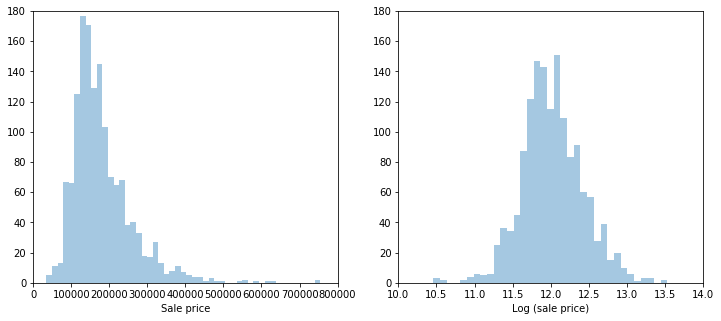

In [6]:
# Set up the matplotlib figure
plt.figure(figsize=(12,5))
#f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plt.subplot(121)
sns.distplot(df['SalePrice'],kde=False)
plt.xlabel('Sale price')
plt.axis([0,800000,0,180])
plt.subplot(122)
sns.distplot(np.log(df['SalePrice']),kde=False)
plt.xlabel('Log (sale price)')
plt.axis([10,14,0,180])

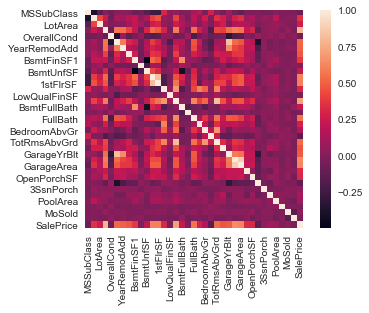

In [7]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:,1:].corr()
#fig = plt.figure()
sns.set(font_scale=1)  
sns.heatmap(corr, vmax=1, square=True)

In [8]:
corr_list = corr['SalePrice'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

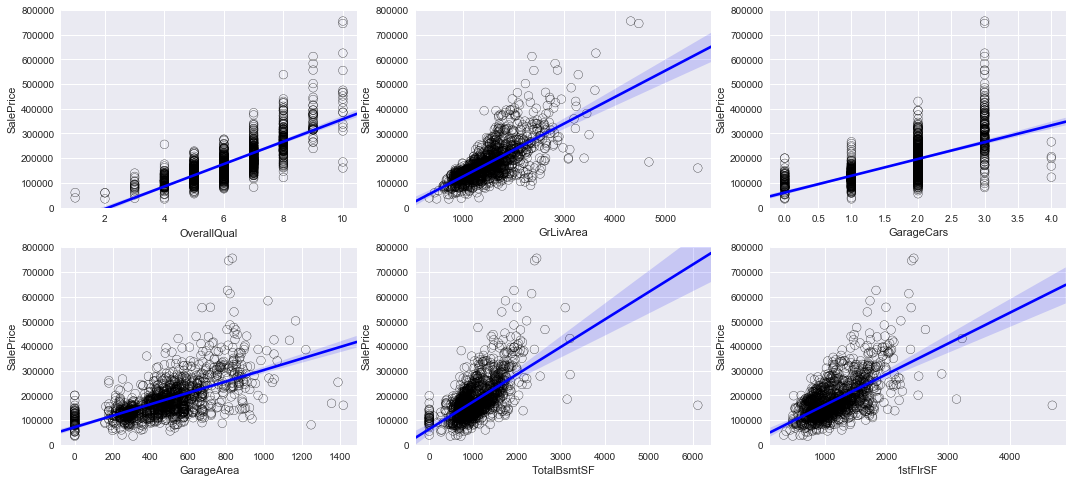

In [9]:
plt.figure(figsize=(18,8))
for i in range(6):
    ii = '23'+str(i+1)
    plt.subplot(ii)
    feature = corr_list.index.values[i]
    plt.scatter(df[feature], df['SalePrice'], facecolors='none',edgecolors='k',s = 75)
    sns.regplot(x = feature, y = 'SalePrice', data = df,scatter=False, color = 'Blue')
    ax=plt.gca() 
    ax.set_ylim([0,800000])

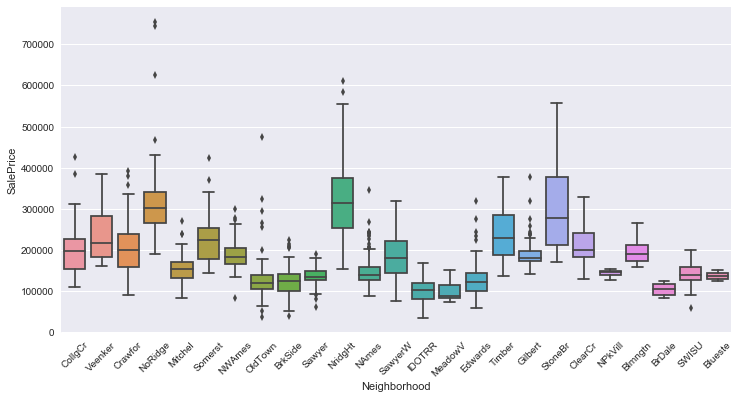

In [10]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = df)
xt = plt.xticks(rotation=45)

# Feature Selection
Importing Required Libraries

In [11]:
import datetime
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
import time
from sklearn import preprocessing
from scipy.stats import skew

F:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
train = pd.read_csv("./input/train.csv") # read train data
test = pd.read_csv("./input/test.csv") # read test data

tables = [train,test]
print ("Delete features with high number of missing values...")
total_missing = train.isnull().sum()
to_delete = total_missing[total_missing>(train.shape[0]/3.)]
for table in tables:
    table.drop(list(to_delete.index),axis=1,inplace=True)

numerical_features = test.select_dtypes(include=["float","int","bool"]).columns.values
categorical_features = train.select_dtypes(include=["object"]).columns.values

Delete features with high number of missing values...


In [14]:
to_delete

Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

# Outlier Detection
Importing Required Libraries

In [15]:
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
%matplotlib inline

In [16]:
train = pd.read_csv("./input/train.csv") 
test = pd.read_csv("./input/test.csv").drop('Id',axis=1,inplace=False)
origin = pd.DataFrame(train['SalePrice'])

In [17]:
dif = np.abs(test-origin) > 12000

In [18]:
idx = dif[dif['SalePrice']].index.tolist()

In [19]:
train.drop(train.index[idx],inplace=True)

In [20]:
train.shape

(1460, 81)

In [21]:
idx

[]

# DESIGNING KERAS MODEL
LABELENCODING TO CONVERT CATEGORICAL DATA TO NUMERICAL DATA

In [26]:
data1=pd.read_csv("./input/train.csv")
test=pd.read_csv("./input/test.csv")

In [27]:
test1=test
data=data1
data=data.drop(["Id","SalePrice"],axis=1)
test1=test1.drop(["Id"],axis=1)
data=pd.concat([data,test1])

In [28]:
data = data.drop(['Utilities'], axis=1)

In [30]:
for col in ("PoolQC","MiscFeature","Alley","Fence","FireplaceQu","MasVnrType","MasVnrArea"):
    data[col] = data[col].fillna('None')
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col] = data[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] =data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)

In [31]:
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])
data["Functional"] =data["Functional"].fillna("Typ")
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['Exterior1st'] =data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
data['MSSubClass'] = data['MSSubClass'].fillna("None")
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [33]:
data["GrLivArea"]=np.log(data["GrLivArea"])
data["1stFlrSF"]=np.log(data["1stFlrSF"])

In [34]:
from sklearn.preprocessing import LabelEncoder
cols=data.columns
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

In [36]:
trainSet=data[0:len(data1)]
target=data1["SalePrice"]
testSet=data[len(data1):len(data)]
x=np.array(trainSet)
y=np.array(target)
testSet1=np.array(testSet)

In [38]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.optimizers import SGD,Adagrad
from keras.metrics import categorical_crossentropy

Using TensorFlow backend.


In [39]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [40]:
x.shape

(1460, 78)

In [41]:
i=1200

j=0.40
model=Sequential()
model.add(Dense(i,input_dim=78,activation="relu"))

model.add(Dense(i,activation='relu'))


model.add(Dropout(j))
model.add(Dropout(j))
model.add(Dropout(j))
model.add(Dropout(j))
model.add(Dropout(j))

model.add( Dense(1,activation="relu"))


model.compile(loss="mse",optimizer="adam",metrics=[coeff_determination])
model.fit(x,y,validation_split=0.2,epochs=500)

Train on 1168 samples, validate on 292 samples
Epoch 1/500
1168/1168 [==============================] - 1s 1ms/step - loss: 26702500881.5342 - coeff_determination: -3.9842 - val_loss: 3611453552.2192 - val_coeff_determination: 0.4741
Epoch 2/500
1168/1168 [==============================] - 1s 1ms/step - loss: 3389553244.9315 - coeff_determination: 0.3258 - val_loss: 2736327448.5479 - val_coeff_determination: 0.6044
Epoch 3/500
1168/1168 [==============================] - 1s 1ms/step - loss: 3125811591.0137 - coeff_determination: 0.4112 - val_loss: 2505961210.7397 - val_coeff_determination: 0.6346
Epoch 4/500
1168/1168 [==============================] - 1s 1ms/step - loss: 2871727275.8356 - coeff_determination: 0.4751 - val_loss: 2384828542.2466 - val_coeff_determination: 0.6544
Epoch 5/500
1168/1168 [==============================] - 1s 1ms/step - loss: 2540551911.4521 - coeff_determination: 0.5007 - val_loss: 2312711573.0411 - val_coeff_determination: 0.6653
Epoch 6/500
1168/1168 [===

Epoch 45/500
1168/1168 [==============================] - 1s 1ms/step - loss: 2074408351.5616 - coeff_determination: 0.6322 - val_loss: 1837812814.9041 - val_coeff_determination: 0.7512
Epoch 46/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1980951785.2055 - coeff_determination: 0.6603 - val_loss: 1886941560.9863 - val_coeff_determination: 0.7354
Epoch 47/500
1168/1168 [==============================] - 1s 1ms/step - loss: 2155713666.6301 - coeff_determination: 0.6151 - val_loss: 1880121301.0411 - val_coeff_determination: 0.7508
Epoch 48/500
1168/1168 [==============================] - 1s 1ms/step - loss: 2029864206.0274 - coeff_determination: 0.6404 - val_loss: 2105628005.6986 - val_coeff_determination: 0.7172
Epoch 49/500
1168/1168 [==============================] - 1s 1ms/step - loss: 2056571839.1233 - coeff_determination: 0.6441 - val_loss: 1820904600.5479 - val_coeff_determination: 0.7561
Epoch 50/500
1168/1168 [==============================] - 1s 1ms/step 

1168/1168 [==============================] - 1s 1ms/step - loss: 1560862600.7671 - coeff_determination: 0.7134 - val_loss: 1639179760.2192 - val_coeff_determination: 0.7821
Epoch 90/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1656958588.4932 - coeff_determination: 0.7011 - val_loss: 1654244416.0000 - val_coeff_determination: 0.7829
Epoch 91/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1680734963.7260 - coeff_determination: 0.6945 - val_loss: 1749687791.3425 - val_coeff_determination: 0.7710
Epoch 92/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1828112954.7397 - coeff_determination: 0.6683 - val_loss: 1753692124.9315 - val_coeff_determination: 0.7488
Epoch 93/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1889750636.7123 - coeff_determination: 0.6792 - val_loss: 1846498870.3562 - val_coeff_determination: 0.7543
Epoch 94/500
1168/1168 [==============================] - 1s 1ms/step - loss: 16825

Epoch 133/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1608638406.1370 - coeff_determination: 0.7281 - val_loss: 1539211336.5479 - val_coeff_determination: 0.7832
Epoch 134/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1438954616.9863 - coeff_determination: 0.7330 - val_loss: 1484607374.9041 - val_coeff_determination: 0.7946
Epoch 135/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1643779252.6027 - coeff_determination: 0.7133 - val_loss: 1856166983.8904 - val_coeff_determination: 0.7206
Epoch 136/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1882377455.7808 - coeff_determination: 0.6717 - val_loss: 1503643529.2055 - val_coeff_determination: 0.7982
Epoch 137/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1436882926.4658 - coeff_determination: 0.7224 - val_loss: 1529345870.9041 - val_coeff_determination: 0.7833
Epoch 138/500
1168/1168 [==============================] - 1s 1ms

Epoch 177/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1340706967.6712 - coeff_determination: 0.7365 - val_loss: 1619955107.9452 - val_coeff_determination: 0.7593
Epoch 178/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1580466882.6301 - coeff_determination: 0.6994 - val_loss: 1727670759.8904 - val_coeff_determination: 0.7428
Epoch 179/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1679871246.0274 - coeff_determination: 0.6849 - val_loss: 1482737654.3562 - val_coeff_determination: 0.7906
Epoch 180/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1404044165.2603 - coeff_determination: 0.7525 - val_loss: 1407794440.5479 - val_coeff_determination: 0.8143
Epoch 181/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1398253229.5890 - coeff_determination: 0.7448 - val_loss: 1462293210.3014 - val_coeff_determination: 0.8021
Epoch 182/500
1168/1168 [==============================] - 1s 1ms

Epoch 221/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1474716082.8493 - coeff_determination: 0.7194 - val_loss: 1392909189.5342 - val_coeff_determination: 0.8151
Epoch 222/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1594313607.0137 - coeff_determination: 0.7148 - val_loss: 1493978137.8630 - val_coeff_determination: 0.7780
Epoch 223/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1499328731.1781 - coeff_determination: 0.7266 - val_loss: 1398128742.5753 - val_coeff_determination: 0.8127
Epoch 224/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1349620702.6849 - coeff_determination: 0.7553 - val_loss: 1352857032.3288 - val_coeff_determination: 0.8106
Epoch 225/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1570288468.1644 - coeff_determination: 0.7230 - val_loss: 1463627805.3699 - val_coeff_determination: 0.7896
Epoch 226/500
1168/1168 [==============================] - 1s 1ms

Epoch 265/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1396367718.5753 - coeff_determination: 0.7368 - val_loss: 1375026872.7671 - val_coeff_determination: 0.8187
Epoch 266/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1395066087.4521 - coeff_determination: 0.7383 - val_loss: 1452708772.3836 - val_coeff_determination: 0.8017
Epoch 267/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1413323935.5616 - coeff_determination: 0.7361 - val_loss: 1409320255.1233 - val_coeff_determination: 0.8148
Epoch 268/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1433893670.5753 - coeff_determination: 0.7425 - val_loss: 1369338465.3151 - val_coeff_determination: 0.8139
Epoch 269/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1353520697.8630 - coeff_determination: 0.7509 - val_loss: 1312038128.6575 - val_coeff_determination: 0.8101
Epoch 270/500
1168/1168 [==============================] - 1s 1ms

Epoch 309/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1387257305.4247 - coeff_determination: 0.7564 - val_loss: 1312215432.3288 - val_coeff_determination: 0.8124
Epoch 310/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1344540822.7945 - coeff_determination: 0.7411 - val_loss: 1261998852.8219 - val_coeff_determination: 0.8214
Epoch 311/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1289044056.5479 - coeff_determination: 0.7490 - val_loss: 1337892606.6849 - val_coeff_determination: 0.8047
Epoch 312/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1374596848.2192 - coeff_determination: 0.7362 - val_loss: 1368387763.7260 - val_coeff_determination: 0.8111
Epoch 313/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1455217881.4247 - coeff_determination: 0.7427 - val_loss: 1313189067.7260 - val_coeff_determination: 0.8213
Epoch 314/500
1168/1168 [==============================] - 1s 1ms

Epoch 353/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1482689737.6438 - coeff_determination: 0.7072 - val_loss: 1370940141.1507 - val_coeff_determination: 0.8017
Epoch 354/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1249795208.7671 - coeff_determination: 0.7772 - val_loss: 1312591448.5479 - val_coeff_determination: 0.7983
Epoch 355/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1224230247.4521 - coeff_determination: 0.7724 - val_loss: 1282641830.5753 - val_coeff_determination: 0.8238
Epoch 356/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1350375198.6849 - coeff_determination: 0.7532 - val_loss: 1405476312.9863 - val_coeff_determination: 0.7848
Epoch 357/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1389717899.3973 - coeff_determination: 0.7447 - val_loss: 1279534540.2740 - val_coeff_determination: 0.8189
Epoch 358/500
1168/1168 [==============================] - 1s 1ms

Epoch 397/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1117827418.3014 - coeff_determination: 0.7842 - val_loss: 1262845806.9041 - val_coeff_determination: 0.8131
Epoch 398/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1141055374.0274 - coeff_determination: 0.7853 - val_loss: 1323584948.3836 - val_coeff_determination: 0.8154
Epoch 399/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1340877596.0548 - coeff_determination: 0.7443 - val_loss: 1247831576.5479 - val_coeff_determination: 0.8195
Epoch 400/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1227993899.8356 - coeff_determination: 0.7757 - val_loss: 1315134535.4521 - val_coeff_determination: 0.8018
Epoch 401/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1271176648.7671 - coeff_determination: 0.7644 - val_loss: 1443444672.4384 - val_coeff_determination: 0.7931
Epoch 402/500
1168/1168 [==============================] - 1s 1ms

Epoch 441/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1139437445.2603 - coeff_determination: 0.7793 - val_loss: 1286512141.8082 - val_coeff_determination: 0.8201
Epoch 442/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1240329086.2466 - coeff_determination: 0.7602 - val_loss: 1265757508.3836 - val_coeff_determination: 0.8139
Epoch 443/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1325137245.8082 - coeff_determination: 0.7601 - val_loss: 1315388210.8493 - val_coeff_determination: 0.8116
Epoch 444/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1211861919.5616 - coeff_determination: 0.7621 - val_loss: 1331079279.3425 - val_coeff_determination: 0.8114
Epoch 445/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1409162081.3151 - coeff_determination: 0.7381 - val_loss: 1242914023.4521 - val_coeff_determination: 0.8110
Epoch 446/500
1168/1168 [==============================] - 1s 1ms

Epoch 485/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1073216686.4658 - coeff_determination: 0.7937 - val_loss: 1294957873.0959 - val_coeff_determination: 0.8137
Epoch 486/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1031432298.9589 - coeff_determination: 0.8015 - val_loss: 1307389269.0411 - val_coeff_determination: 0.8027
Epoch 487/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1104282076.9315 - coeff_determination: 0.7872 - val_loss: 1320644149.0411 - val_coeff_determination: 0.8108
Epoch 488/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1307285454.0274 - coeff_determination: 0.7460 - val_loss: 1264825507.5068 - val_coeff_determination: 0.7998
Epoch 489/500
1168/1168 [==============================] - 1s 1ms/step - loss: 1317402525.8082 - coeff_determination: 0.7520 - val_loss: 1346986086.5753 - val_coeff_determination: 0.7966
Epoch 490/500
1168/1168 [==============================] - 1s 1ms

In [42]:
 prediction=model.predict(testSet1)

In [43]:
(prediction)

array([[ 115712.0703125],
       [ 166315.140625 ],
       [ 187738.234375 ],
       ..., 
       [ 174498.328125 ],
       [ 130424.421875 ],
       [ 235921.421875 ]], dtype=float32)

In [44]:
prediction_df=pd.DataFrame((prediction),columns=["SalePrice"])
predictedTest=pd.concat([test["Id"],prediction_df],axis=1)

In [45]:
predictedTest.to_csv("Keras_Submission.csv",index=False)

**KAGGLE SCORE**

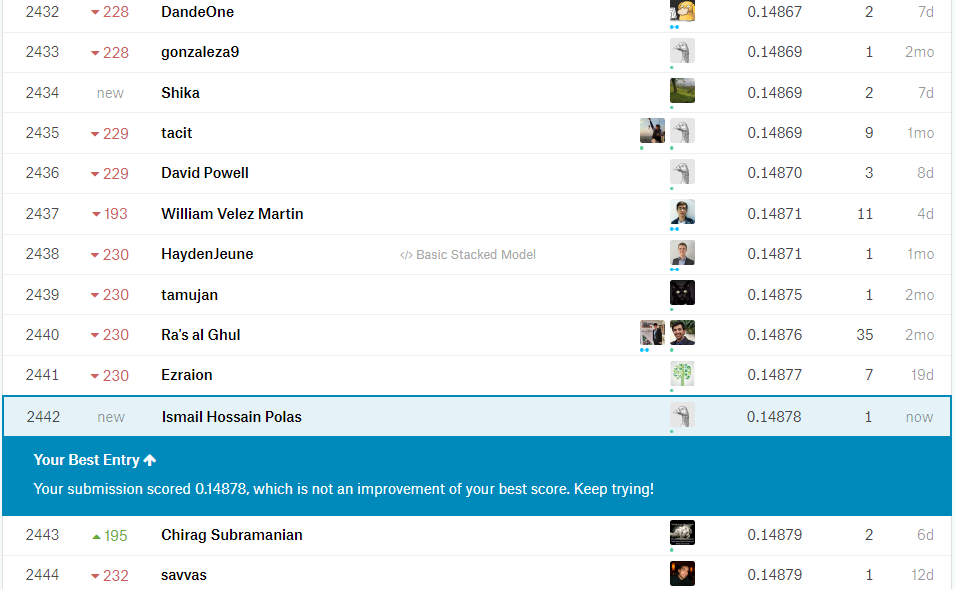

In [46]:
from PIL import Image
IM=Image.open("Keras_submission.png")
IM

# Designing Ensemble
Importing Required Libraries

In [47]:
import datetime
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
import time
from sklearn import preprocessing
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import Ridge, LassoCV,LassoLarsCV, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from scipy.stats import skew

F:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


**Build A Model Library**

In [59]:
train = pd.read_csv("./input/train.csv") # read train data
test = pd.read_csv("./input/test.csv") # read test data

In [60]:
base_models = [
        RandomForestRegressor(
            n_jobs=1, random_state=0,
            n_estimators=500, max_features=14
        ),
        RandomForestRegressor(
            n_jobs=1, random_state=0,
            n_estimators=500, max_features=20,
	    max_depth = 7
        ),
        ExtraTreesRegressor(
            n_jobs=1, random_state=0, 
            n_estimators=500, max_features=15
        ),
        ExtraTreesRegressor(
            n_jobs=1, random_state=0, 
          n_estimators=500, max_features=20
        ),
        GradientBoostingRegressor(
            random_state=0, 
            n_estimators=500, max_features=10, max_depth=6,
            learning_rate=0.05, subsample=0.8
        ),
	GradientBoostingRegressor(
            random_state=0, 
            n_estimators=500, max_features=15, max_depth=6,
            learning_rate=0.05, subsample=0.8
        ),
        XGBRegressor(
            seed=0,
            n_estimators=500, max_depth=10,
            learning_rate=0.05, subsample=0.8, colsample_bytree=0.75
        ),
 
        XGBRegressor(
            seed=0,
            n_estimators=500, max_depth=7,
            learning_rate=0.05, subsample=0.8, colsample_bytree=0.75
        ),
	LassoCV(alphas = [1, 0.1, 0.001, 0.0005]),
	KNeighborsRegressor(n_neighbors = 5),
       	KNeighborsRegressor(n_neighbors = 10),
      	KNeighborsRegressor(n_neighbors = 15),
        KNeighborsRegressor(n_neighbors = 25),
	LassoLarsCV(),
	ElasticNet(),
	SVR()
    ]

**Data Preprocess**

In [61]:
def data_preprocess(train,test):
    outlier_idx = [4,11,13,20,46,66,70,167,178,185,199, 224,261, 309,313,318, 349,412,423,440,454,477,478, 523,540, 581,588,595,654,688, 691, 774, 798, 875, 898,926,970,987,1027,1109, 1169,1182,1239, 1256,1298,1324,1353,1359,1405,1442,1447]
    train.drop(train.index[outlier_idx],inplace=True)
    all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                          test.loc[:,'MSSubClass':'SaleCondition']))
    
    to_delete = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
    all_data = all_data.drop(to_delete,axis=1)

    train["SalePrice"] = np.log1p(train["SalePrice"])
    #log transform skewed numeric features
    numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
    skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
    skewed_feats = skewed_feats[skewed_feats > 0.75]
    skewed_feats = skewed_feats.index
    all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
    all_data = pd.get_dummies(all_data)
    all_data = all_data.fillna(all_data.mean())
    X_train = all_data[:train.shape[0]]
    X_test = all_data[train.shape[0]:]
    y = train.SalePrice

    return X_train,X_test,y

In [62]:
def mean_squared_error_(ground_truth, predictions):
    return mean_squared_error(ground_truth, predictions) ** 0.5
RMSE = make_scorer(mean_squared_error_, greater_is_better=False)

In [63]:
class ensemble(object):
    def __init__(self, n_folds, stacker, base_models):
        self.n_folds = n_folds
        self.stacker = stacker
        self.base_models = base_models
    def fit_predict(self,train,test,ytr):
        X = train.values
        y = ytr.values
        T = test.values
        folds = list(KFold(len(y), n_folds = self.n_folds, shuffle = True, random_state = 0))
        S_train = np.zeros((X.shape[0],len(self.base_models)))
        S_test = np.zeros((T.shape[0],len(self.base_models))) 
        for i,reg in enumerate(base_models):
            print ("Fitting the base model...")
            S_test_i = np.zeros((T.shape[0],len(folds))) 
            for j, (train_idx,test_idx) in enumerate(folds):
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]
                reg.fit(X_train,y_train)
                y_pred = reg.predict(X_holdout)[:]
                S_train[test_idx,i] = y_pred
                S_test_i[:,j] = reg.predict(T)[:]
            S_test[:,i] = S_test_i.mean(1)
         
        print ("Stacking base models...")
        # tuning the stacker
        param_grid = {'alpha': [1e-3,5e-3,1e-2,5e-2,1e-1,0.2,0.3,0.4,0.5,0.8,1e0,3,5,7,1e1],}
        grid = GridSearchCV(estimator=self.stacker, param_grid=param_grid, n_jobs=1, cv=5, scoring=RMSE)
        grid.fit(S_train, y)
        try:
            print('Param grid:')
            print(param_grid)
            print('Best Params:')
            print(grid.best_params_)
            print('Best CV Score:')
            print(-grid.best_score_)
            print('Best estimator:')
            print(grid.best_estimator_)
            print(message)
        except:
            pass

        y_pred = grid.predict(S_test)[:]
        return y_pred, -grid.best_score_

In [64]:
ensem = ensemble(
        n_folds=5,
	stacker=Ridge(),
        base_models=base_models
    )

In [65]:
X_train,X_test,y_train = data_preprocess(train,test)
y_pred, score = ensem.fit_predict(X_train,X_test,y_train)

Fitting the base model...
Fitting the base model...
Fitting the base model...
Fitting the base model...
Fitting the base model...
Fitting the base model...
Fitting the base model...
Fitting the base model...
Fitting the base model...
Fitting the base model...
Fitting the base model...
Fitting the base model...
Fitting the base model...
Fitting the base model...


F:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 14 iterations, i.e. alpha=1.578e-03, with an active set of 12 regressors, and the smallest cholesky pivot element being 1.825e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 51 iterations, i.e. alpha=3.833e-04, with an active set of 49 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 59 iterations, i.e. alpha=3.482e-04, with an active set of 57 regressors, and the smallest cholesky pivot element being 1.825e-08. Redu

F:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 67 iterations, i.e. alpha=1.825e-04, with an active set of 65 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 121 iterations, i.e. alpha=9.824e-05, with an active set of 111 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 124 iterations, i.e. alpha=9.540e-05, with an active set of 114 regressors, and the smallest cholesky pivot element being 1.490e-08. 

F:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 163 iterations, i.e. alpha=4.437e-05, with an active set of 149 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 163 iterations, i.e. alpha=4.427e-05, with an active set of 149 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 184 iterations, i.e. alpha=3.496e-05, with an active set of 160 regressors, and the smallest cholesky pivot element being 6.909e-08

Fitting the base model...
Fitting the base model...
Stacking base models...
Param grid:
{'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1.0, 3, 5, 7, 10.0]}
Best Params:
{'alpha': 0.5}
Best CV Score:
0.1006822219728786
Best estimator:
Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


**Create Submission**

In [66]:
def create_submission(prediction,score):
    now = datetime.datetime.now()
    sub_file = 'submission_'+str(score)+'_'+str(now.strftime("%Y-%m-%d-%H-%M"))+'.csv'
    #sub_file = 'prediction_training.csv'
    print ('Creating submission: ', sub_file)
    pd.DataFrame({'Id': test['Id'].values, 'SalePrice': prediction}).to_csv(sub_file, index=False)

In [67]:
create_submission(np.expm1(y_pred),score)

Creating submission:  submission_0.1006822219728786_2018-08-13-12-48.csv


**KAGGLE SCORE**

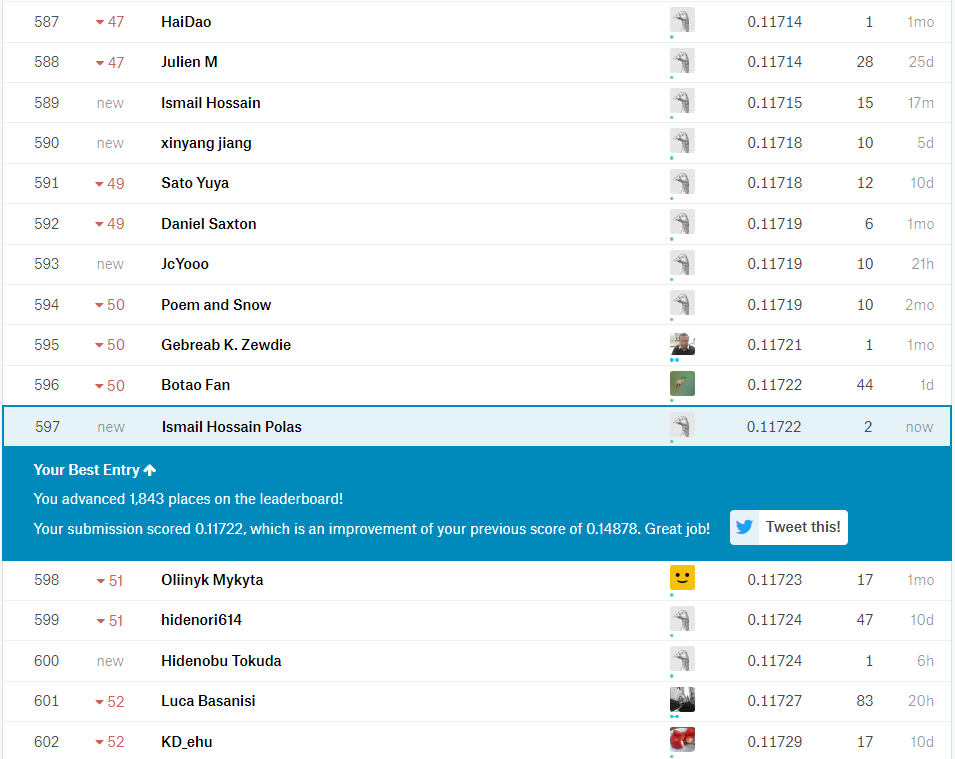

In [68]:
from PIL import Image
IM=Image.open("Ensemble_submission.png")
IM

# Conclusion

First Model was used in the neural network (Keras) to obtain a Kaggle score of about 0.14878.

First Model was used in Ensemble (Random Forest & XGBooster) to obtain a Kaggle score of about 0.11722.